1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

3.4661629670697414
Probability to get 15 or more hurricanes in a year : 0.13726297097147905 %


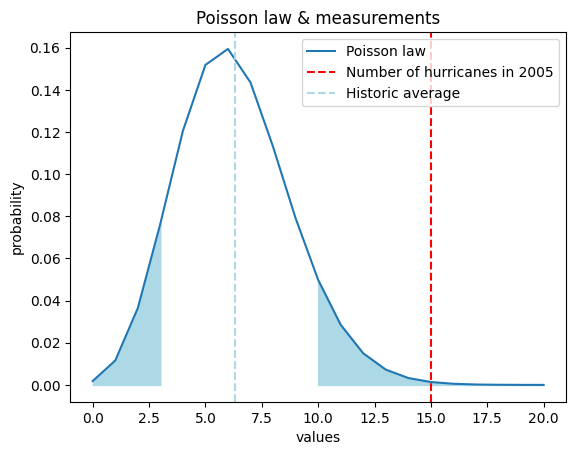

In [25]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

x = 15
avg = 6.3

zTest = abs(x - avg) / np.sqrt(avg)
print(zTest)
# Z-score larger than 3 -> statisticly significant

xValues = np.linspace(0, 20, 21)
poisson = stats.poisson.pmf(xValues, avg)

plt.figure()
plt.plot(xValues, poisson, label="Poisson law")
plt.axvline(x, linestyle="--", color="red", label="Number of hurricanes in 2005")
plt.axvline(avg, linestyle="--", color="lightblue", label="Historic average")
plt.fill_between(xValues, poisson, where=np.abs(xValues) < np.abs(zTest), color="lightblue")
plt.fill_between(xValues, poisson, where=np.abs(xValues) > np.abs(zTest+avg), color="lightblue")
plt.title("Poisson law & measurements")
plt.xlabel("values")
plt.ylabel("probability")
plt.legend()

probability = stats.poisson.pmf(k=15, mu=6.3)
print("Probability to get 15 or more hurricanes in a year :",probability*100,"%")
# In 2005, the number of hurricanes was significantly different

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [28]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = 10

preMean = np.mean(pre)
preStd = np.std(pre)

postMean = np.mean(post)
postStd = np.std(post)

sigma = np.sqrt((preStd**2 + postStd**2) / 2)
test = (preMean - postMean) / (sigma * np.sqrt(2 / n))
print(test)

pvalue = stats.t.cdf(test, n - 1) + (1.0 - stats.t.cdf(-test, n - 1))
print(pvalue)
# pvalue < 0.05 -> hypothesis rejected

-3.991846326292112
0.00314894093545364


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

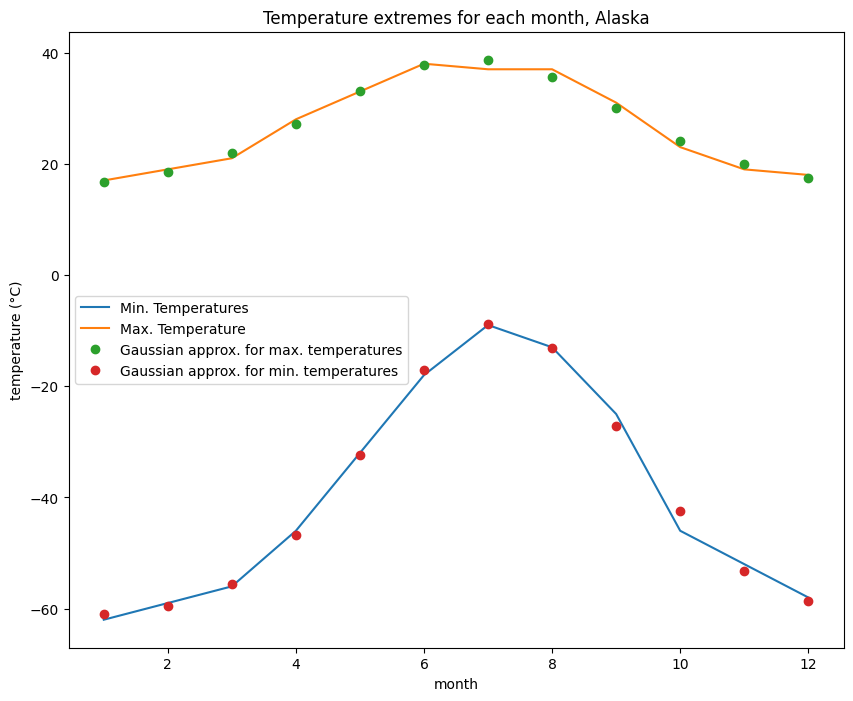

In [55]:
from scipy import optimize

maxTemp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
minTemp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

months = np.linspace(1, 12, 12)

plt.figure(figsize=(10,8))
plt.plot(months, minTemp, label="Min. Temperatures")
plt.plot(months, maxTemp, label="Max. Temperature")
plt.xlabel("month")
plt.ylabel("temperature (°C)")
plt.legend()
plt.title("Temperature extremes for each month, Alaska")


def f(values, amplitude, offset, avg, std):
    return offset + amplitude * stats.norm.pdf(values, avg, std)


maxAmplitude = abs(maxTemp.max() - maxTemp.min())
maxStd = np.std(maxTemp)
maxOffset = maxTemp.min()
# maxAvg = np.mean(maxTemp)

minAmplitude = abs(minTemp.max() - minTemp.min())
minStd = np.std(minTemp)
minOffset = minTemp.min()
# minAvg = np.mean(minTemp)

avg = np.mean(months)

maxGauss, temp = optimize.curve_fit(
    f, months, maxTemp, p0=[maxAmplitude, maxOffset, avg, maxStd]
)
minGauss, temp = optimize.curve_fit(
    f, months, minTemp, p0=[minAmplitude, minOffset, avg, minStd]
)

plt.plot(months,f(months,maxGauss[0],maxGauss[1],maxGauss[2],maxGauss[3]),"o",label="Gaussian approx. for max. temperatures")
plt.plot(months,f(months,minGauss[0],minGauss[1],minGauss[2],minGauss[3]),"o",label="Gaussian approx. for min. temperatures")
plt.legend()

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

0.9999801937227037


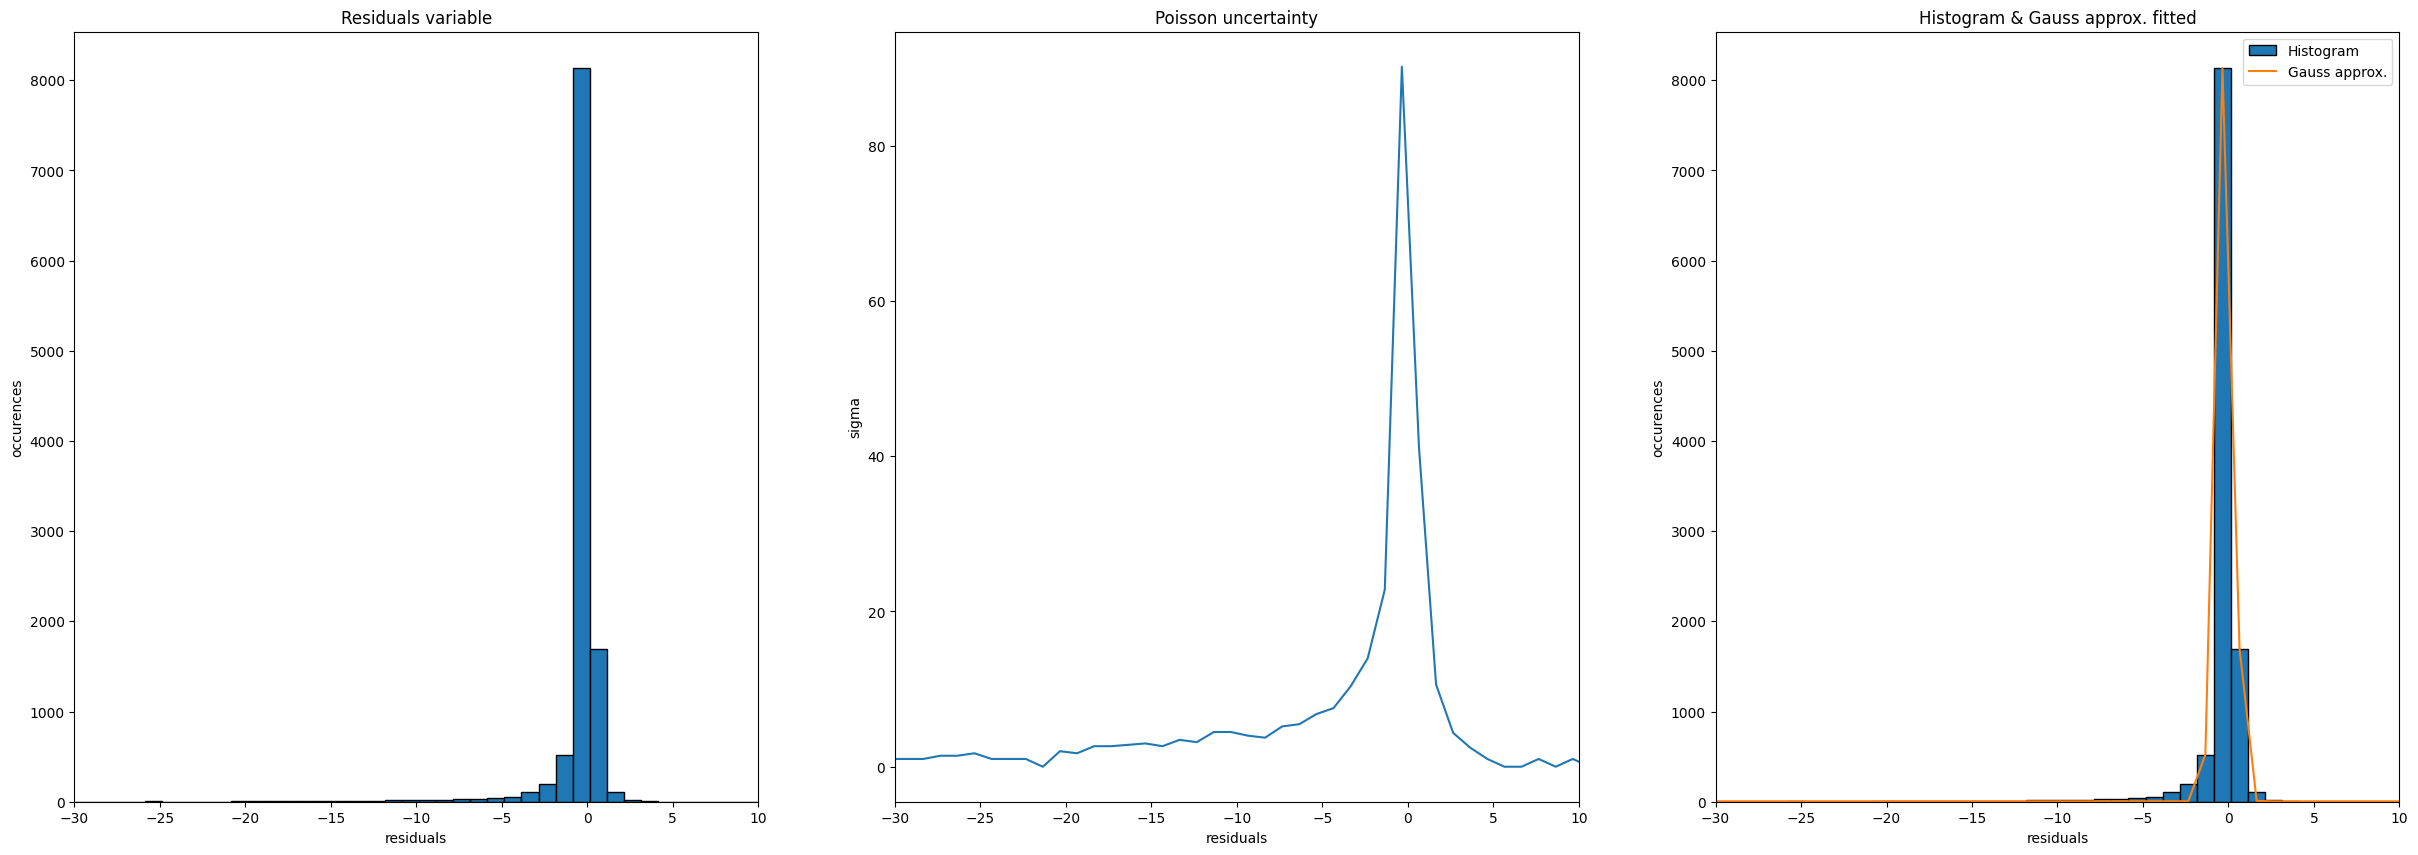

In [134]:
import pandas as pd

file = pd.read_pickle("data/residuals_261.pkl")
dataFrame = pd.DataFrame(file[()])
dataFrame = dataFrame[["residuals"]]

figure = plt.figure(figsize=(30, 10))

ax = figure.add_subplot(1, 3, 1)
bins = np.arange(dataFrame.residuals.min(), dataFrame.residuals.max())
hist, bins, patches = ax.hist(dataFrame.residuals, bins=bins, edgecolor="black")
ax.set_xlim(-30, 10)
ax.set_xlabel("residuals")
ax.set_ylabel("occurences")
ax.set_title("Residuals variable")

values = (bins[:-1] + bins[1:]) / 2
sigma = np.sqrt(hist)
ax = figure.add_subplot(1, 3, 2)
ax.plot(values, sigma)
ax.set_xlim(-30, 10)
ax.set_xlabel("residuals")
ax.set_ylabel("sigma")
ax.set_title("Poisson uncertainty")


def f(values, amplitude, offset, avg, std):
    return offset + amplitude * stats.norm.pdf(values, avg, std)


avg = np.mean(hist)
std = np.std(hist)
amplitude = abs(hist.max() - hist.min())
offset = hist.min()
gauss, temp = optimize.curve_fit(f, values, hist, p0=[amplitude, offset, avg, std])
ax = figure.add_subplot(1, 3, 3)
hist, bins, patches = ax.hist(
    dataFrame.residuals, bins=bins, edgecolor="black", label="Histogram"
)
ax.plot(
    values, f(values, gauss[0], gauss[1], gauss[2], gauss[3]), label="Gauss approx."
)
ax.set_xlim(-30, 10)
ax.legend()
ax.set_xlabel("residuals")
ax.set_ylabel("occurences")
ax.set_title("Histogram & Gauss approx. fitted")

ndof = len(values)-1
hist_hat = f(values,gauss[0], gauss[1], gauss[2], gauss[3])
chi2 = np.sum((hist-hist_hat)**2/std)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print(pvalue)
# pvalue close to 1 -> fit satisfying

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

Min temperature : -0.7432744304518266
Max temperature : 19.25108941581189
Average temperature : 9.25405114901883
SSR : 24678.63391611244
TSS : 115905.13070195736
RSQ : 0.7870790208625711


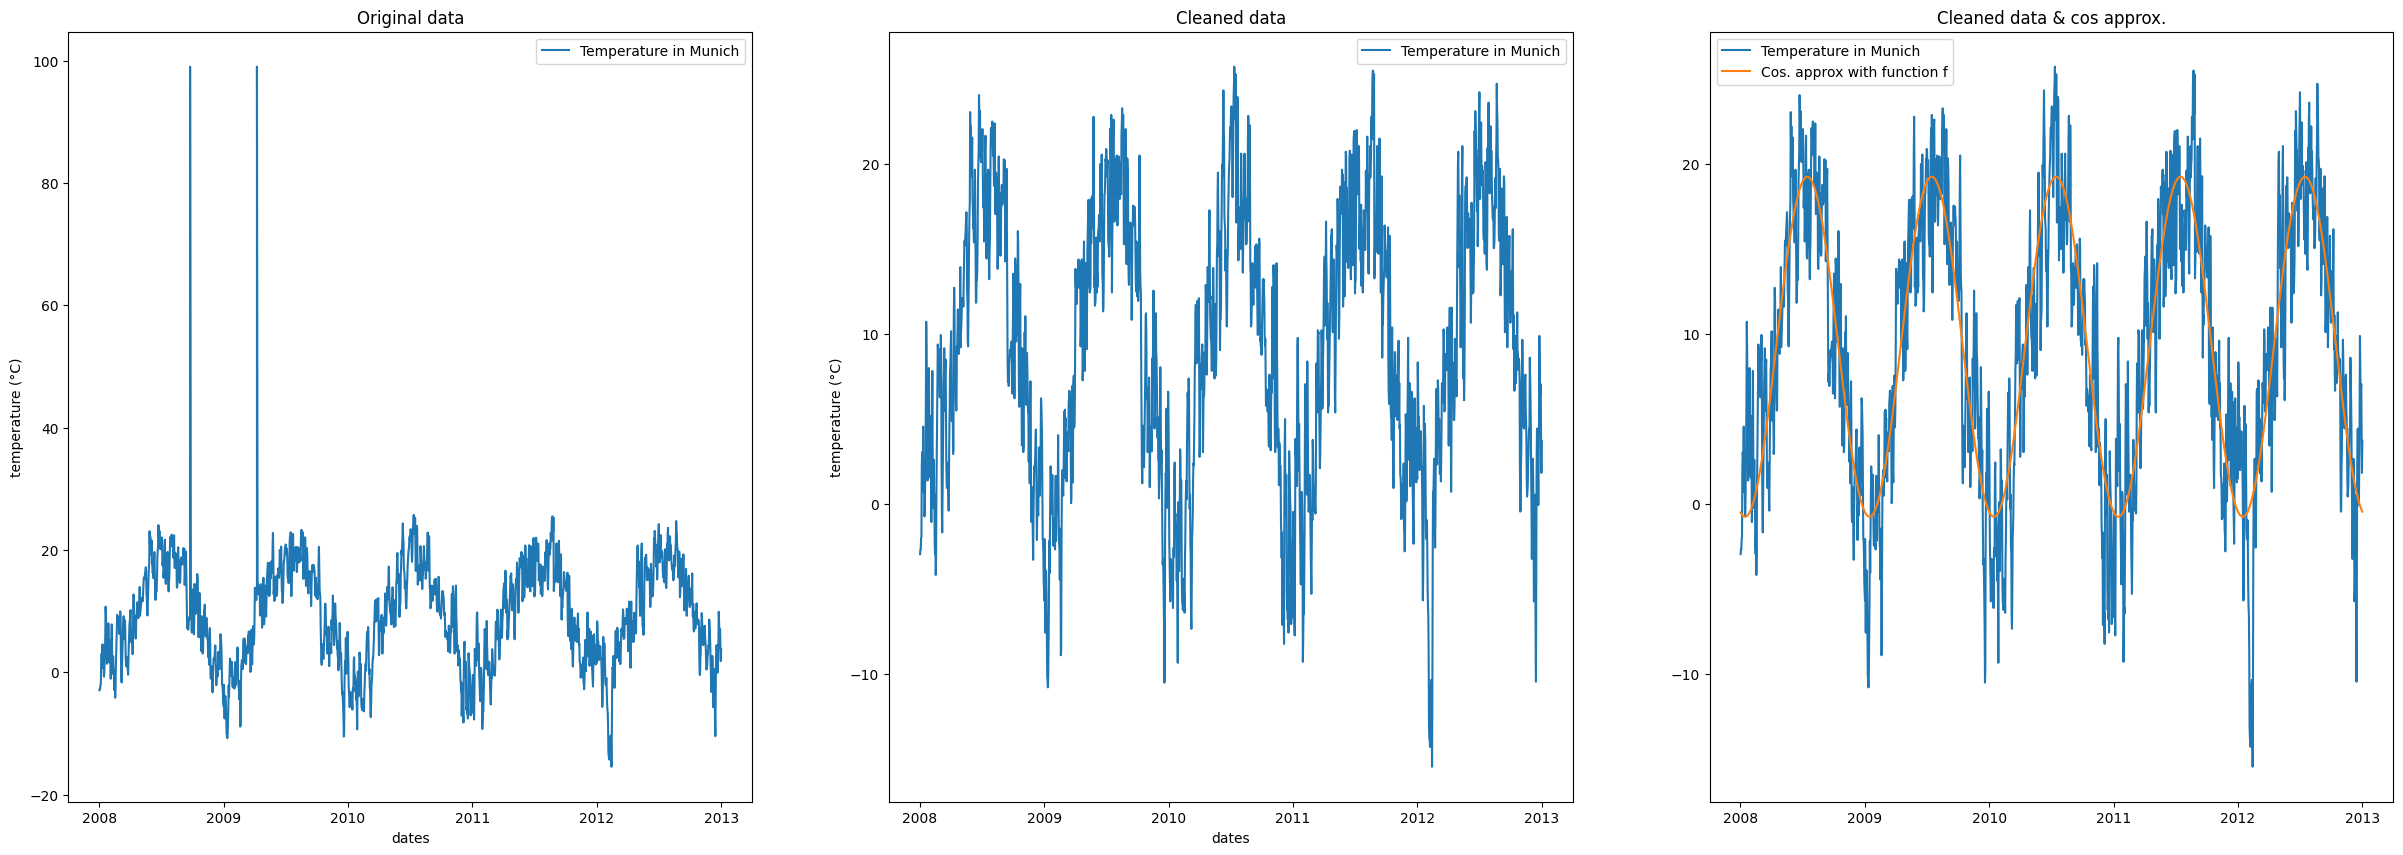

In [156]:
dataFrame = pd.read_csv(
    "data/munich_temperatures_average_with_bad_data.txt",
    delimiter=" ",
    names=["Date", "Temperature"],
)
dataFrame = dataFrame[(dataFrame["Date"] >= 2008) & (dataFrame["Date"] < 2013)]

figure = plt.figure(figsize=(30, 10))

ax = figure.add_subplot(1, 3, 1)
ax.plot(dataFrame["Date"], dataFrame["Temperature"], label="Temperature in Munich")
ax.set_xlabel("dates")
ax.set_ylabel("temperature (°C)")
ax.set_title("Original data")
ax.legend()

dataFrame = dataFrame[dataFrame["Temperature"] < 99]
ax = figure.add_subplot(1, 3, 2)
ax.plot(dataFrame["Date"], dataFrame["Temperature"], label="Temperature in Munich")
ax.set_xlabel("dates")
ax.set_ylabel("temperature (°C)")
ax.set_title("Cleaned data")
ax.legend()


def f(values, a, b, c):
    return a * np.cos(2 * np.pi * values + b) + c


temperatures = dataFrame["Temperature"]
dates = dataFrame["Date"]
amplitude = abs(temperatures.max() - temperatures.min())
avg = np.mean(temperatures)
offset = temperatures.min()
cos, temp = optimize.curve_fit(f, dates, temperatures, p0=[amplitude, offset, avg])
ax = figure.add_subplot(1, 3, 3)
ax.plot(dates, temperatures, label="Temperature in Munich")
ax.plot(dates, f(dates, cos[0], cos[1], cos[2]), label="Cos. approx with function f")
ax.legend()
ax.set_title("Cleaned data & cos approx.")

f = f(dates, cos[0], cos[1], cos[2])
print("Min temperature :", f.min())
print("Max temperature :", f.max())
print("Average temperature :", f.mean())

ssr = np.sum((f - temperatures) ** 2)
tss = np.sum((avg - temperatures) ** 2)
rsq = 1 - ssr / tss
print("SSR :",ssr)
print("TSS :",tss)
print("RSQ :",rsq)